In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, geom, ttest_1samp, ttest_ind, ttest_rel, chi2, chisquare, chi2_contingency
from scipy.stats import levene, kruskal, shapiro, f_oneway, pearsonr, spearmanr, poisson, expon
from statsmodels.graphics.gofplots import qqplot

In [3]:
walmart= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094.csv")

In [ ]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Dataset has 05 columns with "integer" entries and remaning 05 has object entries.
rows count = 550068

In [ ]:
walmart.shape

(550068, 10)

In [ ]:
walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
walmart.isna().sum()
# No any missing values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
walmart.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

5891 users are contributing this whole table.

3631 products are selling in market.

Only 02 genders are reported.

07 group ages are there.

21 Occupation (int).

03 Cities in observation.

05 types of stay_in_city.

boolean type marital status.

20 product_categories are there.

In [ ]:
walmart_cat_col= walmart.dtypes == "object"
walmart_cat_col= list(walmart_cat_col[walmart_cat_col].index)
walmart_cat_col

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [ ]:
walmart_obj_col= walmart.dtypes != "object"
walmart_obj_col= list(walmart_obj_col[walmart_obj_col].index)
walmart_obj_col

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

In [ ]:
walmart["Gender"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
walmart["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
walmart["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
walmart["Age"].value_counts().reset_index().sort_values(["index"], ascending= True)
# index wise sorting, shows counts of individuals over the 07 age groups.
# maximum listing is under 26-35 age group then 36-45
# 0-17 also has some numbers of entries.

,index,Age
6,0-17,15102
2,18-25,99660
0,26-35,219587
1,36-45,110013
3,46-50,45701
4,51-55,38501
5,55+,21504


In [ ]:
walmart["Age"].value_counts().reset_index().sort_values(["Age"], ascending= False)

,index,Age
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


In [ ]:
walmart["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
walmart["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
walmart["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
walmart["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [31]:
# For unique counts
walmart.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [32]:
walmart.groupby("Age")["User_ID"].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [ ]:
walmart.groupby(["Product_Category"])["Purchase"].aggregate(["sum","mean","median"]).sort_values("median", ascending= False)

,sum,mean,median
Product_Category,,,
10,100837301,19675.570927,19197.0
7,60896731,16365.689600,16700.0
15,92969042,14780.451828,16660.0
6,324150302,15838.478550,16312.0
16,145120612,14766.037037,16292.5
1,1910013754,13606.218596,15245.0
14,20014696,13141.625739,14654.0
9,6370324,15537.375610,14388.5
2,268516186,11251.935384,12728.5


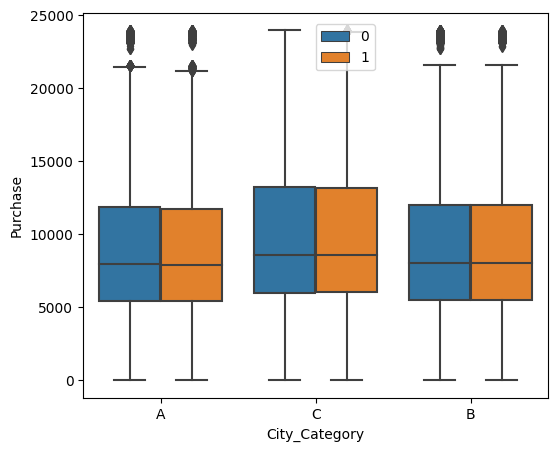

In [ ]:
plt.figure(figsize= (6,5))
sns.boxplot(data= walmart, x="City_Category", y="Purchase", hue="Marital_Status")
plt.legend(loc=(0.5,0.85))
# Outliers and overlapping is present here in dataset wrt city category and purchase power.

In [ ]:
walmart.groupby(["User_ID"])["Product_ID"].aggregate(["count"]).sort_values("count",ascending= False)
# Every user's total purchase wrt its count.
# Count plot is not beneficial here due to approx 5800 enrties

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1002111,7
1005391,7
1002690,7


<Axes: xlabel='Age', ylabel='count'>

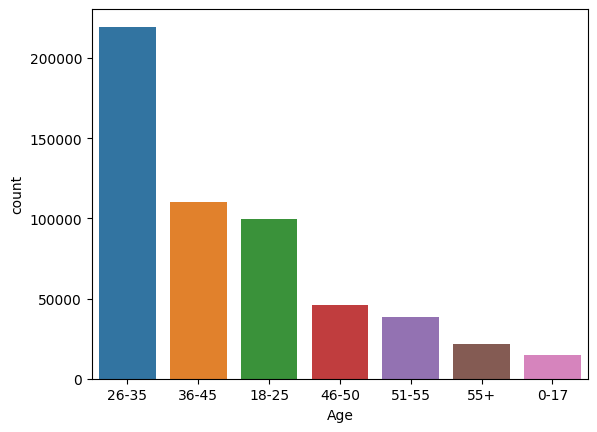

In [ ]:
sns.countplot(data= walmart, x= walmart["Age"], order= walmart["Age"].value_counts().index)

<Axes: xlabel='Age', ylabel='count'>

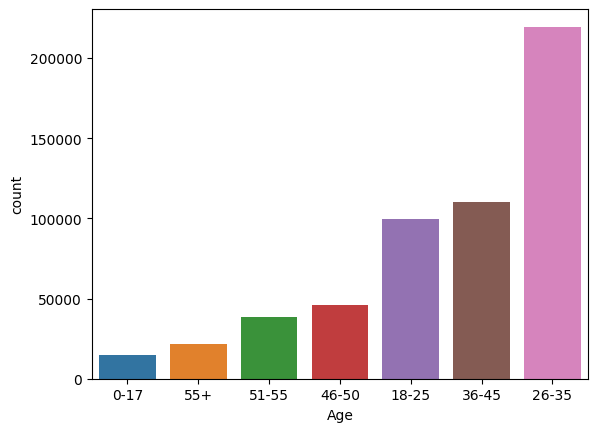

In [ ]:
sns.countplot(data= walmart, x= walmart["Age"], order= walmart["Age"].value_counts(ascending= True).index)

<Axes: xlabel='Gender', ylabel='count'>

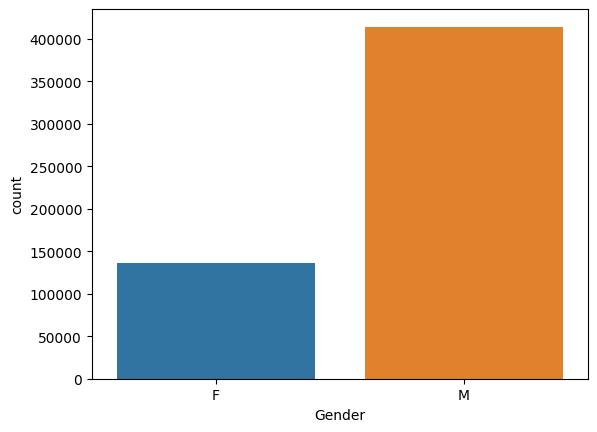

In [ ]:
sns.countplot(data= walmart, x= "Gender")

<Axes: xlabel='Gender', ylabel='Purchase'>

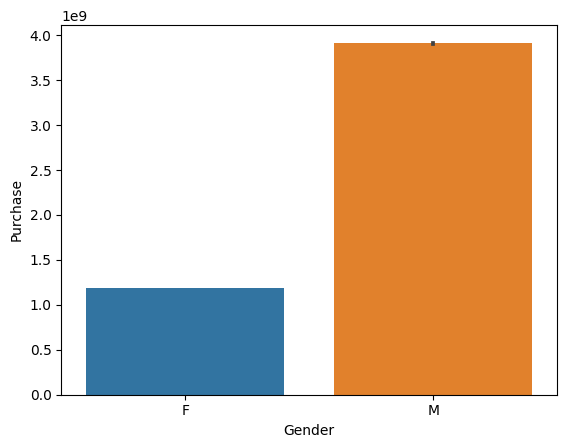

In [ ]:
sns.barplot(data= walmart, x= "Gender", y= "Purchase", estimator= np.sum)
# total sum of purchase value for Men is way more than women.
# count is also greater for Men wrt Women.

<Axes: xlabel='City_Category', ylabel='Purchase'>

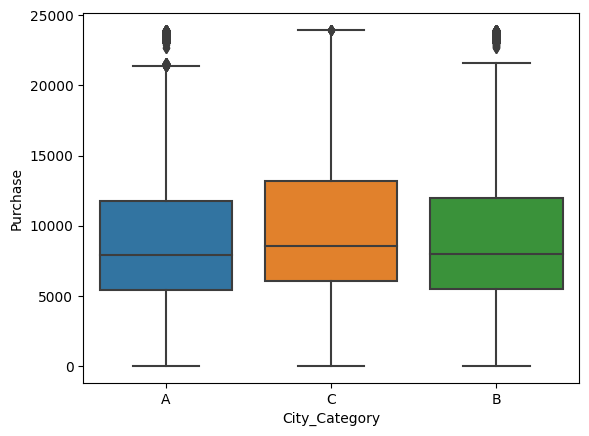

In [ ]:
sns.boxplot(data= walmart, y= "Purchase", x= "City_Category")

<Axes: ylabel='Purchase'>

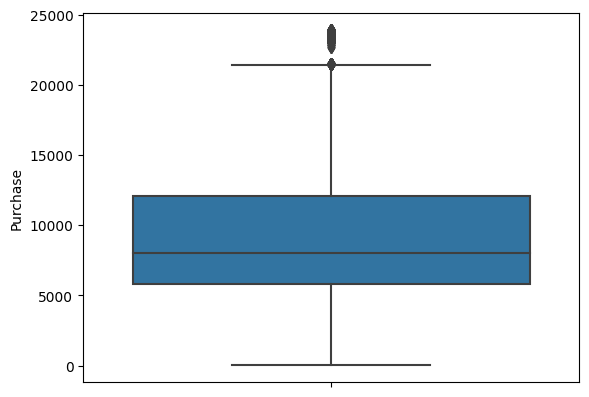

In [ ]:
sns.boxplot(data= walmart, y= "Purchase")

<Axes: xlabel='Product_Category', ylabel='Purchase'>

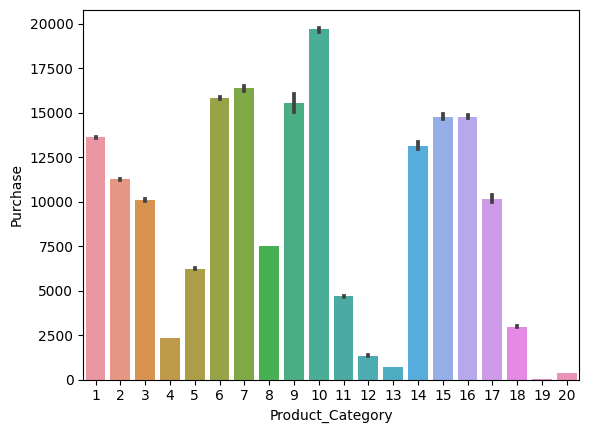

In [ ]:
sns.barplot(data= walmart, x= "Product_Category", y= "Purchase")

In [ ]:
purchase_mean= walmart["Purchase"].mean()
purchase_median= walmart["Purchase"].median()
np.mod(purchase_mean, purchase_median)

1216.9687129591257

In [ ]:
print(purchase_mean, purchase_median)

9263.968712959126 8047.0


<Axes: xlabel='Purchase', ylabel='Count'>

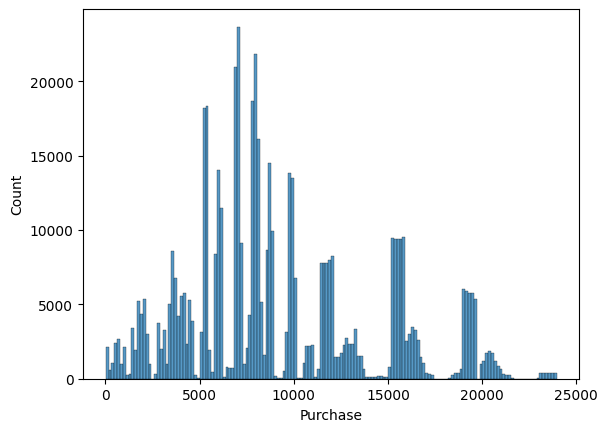

In [ ]:
sns.histplot(walmart["Purchase"])
# Looks like normal curve but right skewed so we have to take sampling and bootstraping.

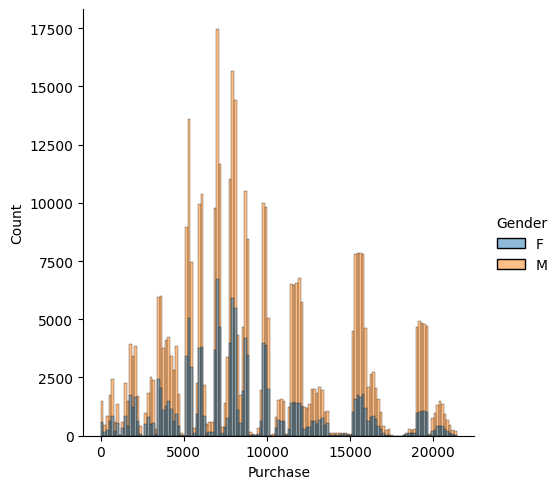

In [33]:
sns.displot(x= "Purchase", hue= "Gender", data= walmart)

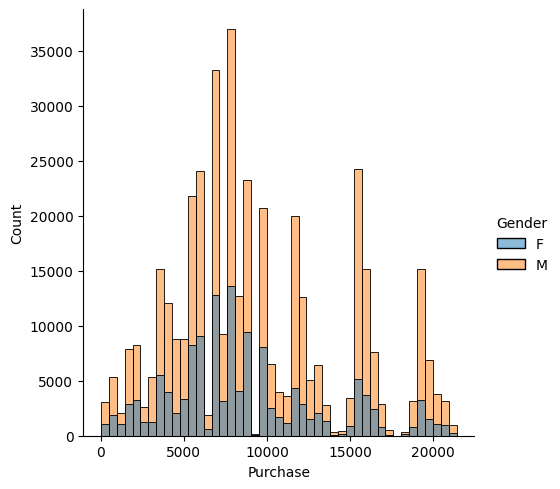

In [37]:
# To get more clarity
sns.displot(x= "Purchase", hue= "Gender", data= walmart, bins= 45)

In [38]:
# CLT and CI by using Bootstraping/ separate the Gender based data
walmart_male= walmart[walmart["Gender"]=="M"]
walmart_female= walmart[walmart["Gender"]=="F"]

In [39]:
'''
Trial 01: Try to bootstrape the data set for appling CLT, for combine list'''
purchase1= []
for reps in range(1000):
  sample1= np.random.choice(walmart["Purchase"], size= 500000)
  sample1_mean= np.mean(sample1)
  purchase1.append(sample1_mean)

<Axes: ylabel='Count'>

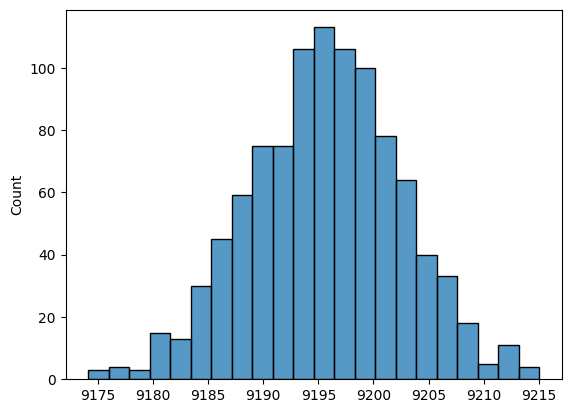

In [40]:
sns.histplot(purchase1)

In [44]:
std_dev1= np.std(purchase1)
mean1= np.mean(purchase1)
print(std_dev1, mean1)

6.878395619315245 9195.634942036


In [43]:
# With 95% Confidence Interval
Confidence_Interval1= np.percentile(purchase1, [2.5, 97.5])
Confidence_Interval1

array([9182.1354621 , 9208.72743515])

In [45]:
# with 99% CI
Confidence_Interval2= np.percentile(purchase1, [0.5, 99.5])
Confidence_Interval2

array([9177.81240225, 9212.97747019])

In [48]:
'''
Trial 2- sampling of male and female dataset'''
walmart_male_sample= [walmart_male.sample(500, replace= True)["Purchase"].mean() for i in range(1000)]
walmart_female_sample= [walmart_female.sample(500, replace= True)["Purchase"].mean() for i in range(1000)]

In [50]:
# 95% CI for male only
std_dev_male= np.std(walmart_male_sample).round(3)
mean_male= np.mean(walmart_male_sample).round(3)
confidence_interval_m1= np.percentile(walmart_male_sample, [2.5, 97.5])
print(std_dev_male, mean_male, confidence_interval_m1)

221.819 9366.929 [8941.1045  9801.02535]


In [51]:
# 99% CI for male only
confidence_interval_m2= np.percentile(walmart_male_sample, [0.5, 99.5])
print(confidence_interval_m2)

[8796.17601 9979.14114]


In [52]:
# 95% CI for female only
std_dev_female= np.std(walmart_female_sample)
mean_female= np.mean(walmart_female_sample)
confidence_interval_f1= np.percentile(walmart_female_sample, [2.5, 97.5])
print(std_dev_female, mean_female, confidence_interval_f1)

203.47265992016142 8668.776344 [8247.37955 9038.3618 ]


In [53]:
# 90% CI value
confidence_interval_m3= np.percentile(walmart_male_sample, [5, 95])
confidence_interval_f3= np.percentile(walmart_female_sample, [5, 95])
print(confidence_interval_m3, confidence_interval_f3)

[9001.1153 9728.4103] [8323.6624 8991.8565]


In [57]:
walmart_married= walmart[walmart["Marital_Status"]==1]
walmart_unmarried= walmart[walmart["Marital_Status"]==0]

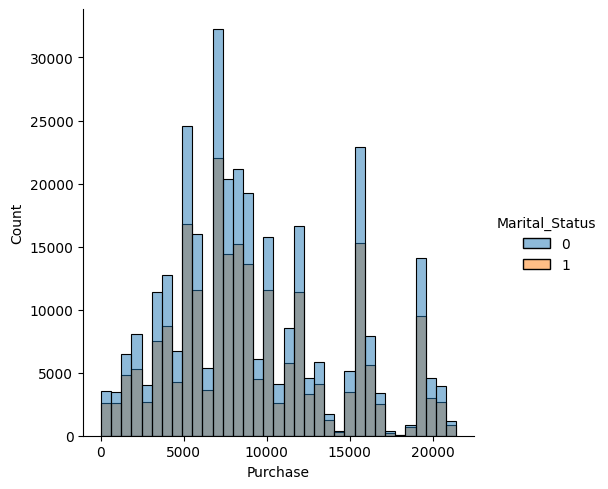

In [58]:
sns.displot(data= walmart, x= "Purchase", hue= "Marital_Status", bins= 35)

In [65]:
walmart_married_sample= [walmart_married.sample(500, replace= True)["Purchase"].mean() for i in range(1000)]
walmart_unmarried_sample= [walmart_unmarried.sample(500, replace= True)["Purchase"].mean() for i in range(1000)]

In [66]:
# 95% CI for married only
std_dev_married= np.std(walmart_married_sample).round(3)
mean_married= np.mean(walmart_married_sample).round(3)
confidence_interval_married1= np.percentile(walmart_married_sample, [2.5, 97.5])
print(std_dev_married, mean_married, confidence_interval_married1)

214.219 9189.541 [8771.1701 9603.0052]


In [67]:
# 95% CI for unmarried only
std_dev_unmarried= np.std(walmart_unmarried_sample).round(3)
mean_unmarried= np.mean(walmart_unmarried_sample).round(3)
confidence_interval_unmarried1= np.percentile(walmart_unmarried_sample, [2.5, 97.5])
print(std_dev_unmarried, mean_unmarried, confidence_interval_unmarried1)

214.434 9198.957 [8754.7181  9610.71525]


<Axes: ylabel='Count'>

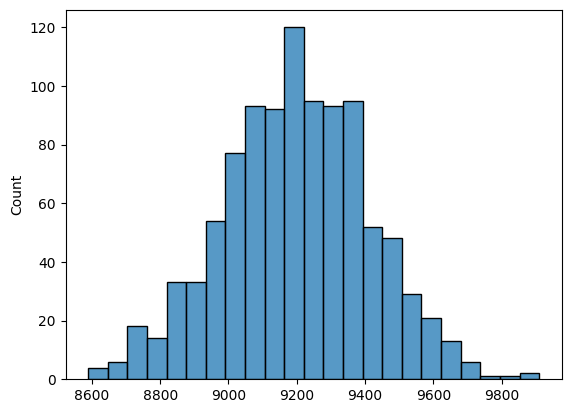

In [68]:
sns.histplot(walmart_unmarried_sample)

<Axes: ylabel='Count'>

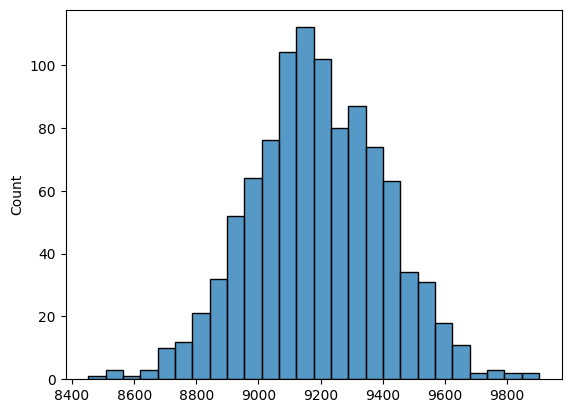

In [69]:
sns.histplot(walmart_married_sample)

HOW TO REMOVE OUTLIERS?

In [10]:
S1= np.percentile(walmart["Purchase"], 25)
S2= np.percentile(walmart["Purchase"], 75)
IQR= S2 - S1
Lower= max(0, S1-(1.5*IQR))
Upper= S2 + 1.5*IQR
print(Lower, Upper)
# Values larger than Upper and smaller than Lower are called as Outliers

0 21400.5


In [11]:
outliers= walmart[(walmart["Purchase"] > 21400.5) | (walmart["Purchase"] < 0)]
out= len(outliers)

In [12]:
rows= walmart.shape[0]

In [13]:
new_rows= rows-out
print(new_rows)

547391


In [14]:
upper_array= np.where(walmart["Purchase"] > Upper)[0]
lower_array= np.where(walmart["Purchase"] < Lower)[0]
# convert the filters into indexing

In [15]:
walmart.drop(index= lower_array, inplace= True)

In [16]:
walmart.shape

(550068, 10)

In [17]:
walmart.drop(index= upper_array, inplace= True)
walmart.shape

(547391, 10)

In [ ]:
# Just to show the difference means and Ranges for 95% CI after removing Outliers
std1= walmart["Purchase"].std()
mean1= walmart["Purchase"].mean()
R9= norm.ppf(0.025)*(std1/(np.sqrt(500000))) + mean1
R10= norm.ppf(0.975)*(std1/(np.sqrt(500000))) + mean1
print(R9, R10)

9181.93758935843 9209.316801013352


In [ ]:
std1= walmart["Purchase"].std()
mean1= walmart["Purchase"].mean()
R9= norm.ppf(0.005)*(std1/(np.sqrt(500000))) + mean1
R10= norm.ppf(0.995)*(std1/(np.sqrt(500000))) + mean1
print(R9, R10)

9177.636003448415 9213.618386923366


In [ ]:
S3= np.percentile(walmart["Purchase"], 25)
S4= np.percentile(walmart["Purchase"], 75)
IQR= S4 - S3
print(S3, S4, IQR)

5721.0 12019.0 6298.0


In [ ]:
std4= walmart["Purchase"].std()
mean4= walmart["Purchase"].mean()
R9= max(0, norm.ppf(0.025)*(std1) + mean1)
R10= norm.ppf(0.975)*(std1) + mean1
print(R9, R10)

0 18875.64030755465


In [18]:
walmart_male= walmart[walmart["Gender"]=="M"]
walmart_male.shape

(412171, 10)

In [19]:
walmart_female= walmart[walmart["Gender"]=="F"]
walmart_female.shape

(135220, 10)

In [20]:
# Ranges for 99% CI
std_dev_m= walmart_male["Purchase"].std()
mean_m= walmart_male["Purchase"].mean()
Range_male1= np.percentile(walmart_male["Purchase"], 0.5).round(3)
Range_male2= np.percentile(walmart_male["Purchase"], 99.5).round(3)
print(Range_male1, Range_male2, mean_m.round(3), std_dev_m.round(3))

359.85 20681.0 9367.724 5009.234


In [21]:
std_dev_f= walmart_female["Purchase"].std()
mean_f= walmart_female["Purchase"].mean()
Range_female1= np.percentile(walmart_female["Purchase"], 0.5).round(3)
Range_female2= np.percentile(walmart_female["Purchase"], 99.5).round(3)
print(Range_female1, Range_female2, mean_f.round(3), std_dev_f.round(3))

241.095 20641.905 8671.049 4679.058


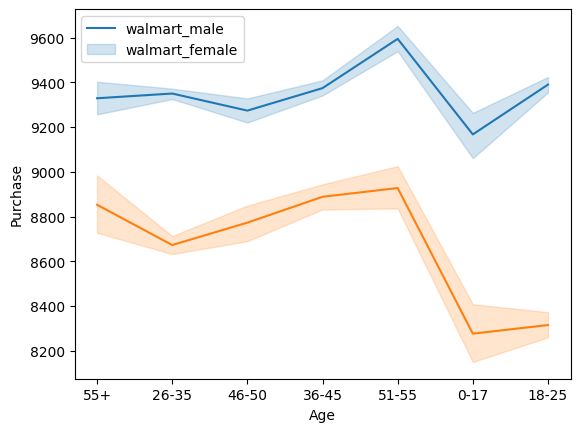

In [ ]:
sns.lineplot(data= walmart_male, x= "Age", y= "Purchase")
sns.lineplot(data= walmart_female, x= "Age", y= "Purchase")
plt.legend(["walmart_male","walmart_female"])

In [22]:
# For 95% CI
range_male3= np.percentile(walmart_male["Purchase"], 2.5).round(3)
range_male4= np.percentile(walmart_male["Purchase"], 97.5).round(3)
print(range_male3, range_male4)

1433.0 19648.0


In [23]:
# For 99% CI
range_male1= np.percentile(walmart_male["Purchase"], 0.5).round(3)
range_male2= np.percentile(walmart_male["Purchase"], 99.5).round(3)
print(range_male1, range_male2)

359.85 20681.0


In [24]:
# For 90% CI
range_male5= np.percentile(walmart_male["Purchase"], 5).round(3)
range_male6= np.percentile(walmart_male["Purchase"], 95).round(3)
print(range_male5, range_male6)

2012.0 19314.0


In [25]:
# For 95% CI
range_female3= np.percentile(walmart_female["Purchase"], 2.5).round(3)
range_female4= np.percentile(walmart_female["Purchase"], 97.5).round(3)
print(range_female3, range_female4)

1375.0 19560.0


In [26]:
# For 90% CI
range_female5= np.percentile(walmart_female["Purchase"], 5).round(3)
range_female6= np.percentile(walmart_female["Purchase"], 95).round(3)
print(range_female5, range_female6)

1883.0 19064.0


In [30]:
std_dev_f
x1= norm.ppf(0.05)*std_dev_f + mean_f
x2= norm.ppf(0.95)*std_dev_f + mean_f
print(x1, x2)

974.682721984359 16367.415355223151


<Axes: xlabel='City_Category', ylabel='Purchase'>

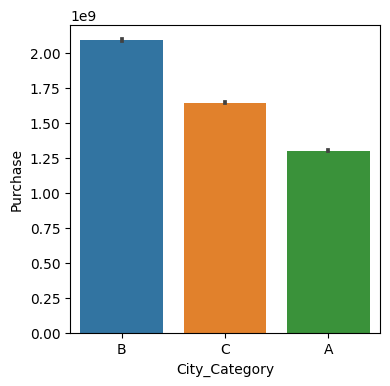

In [75]:
plt.figure(figsize=(4,4))
sns.barplot(data= walmart, x= "City_Category", y= "Purchase", estimator= "sum", order= walmart["City_Category"].value_counts().index)

<Axes: xlabel='City_Category', ylabel='count'>

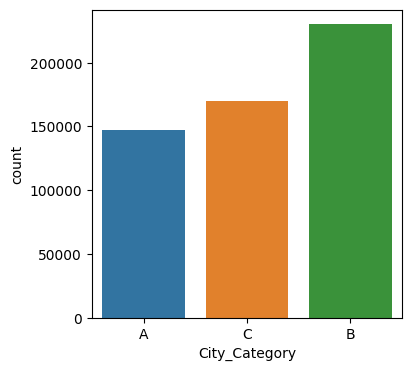

In [76]:
plt.figure(figsize=(4,4))
sns.countplot(data= walmart, x= "City_Category")

<Axes: xlabel='Product_Category', ylabel='Density'>

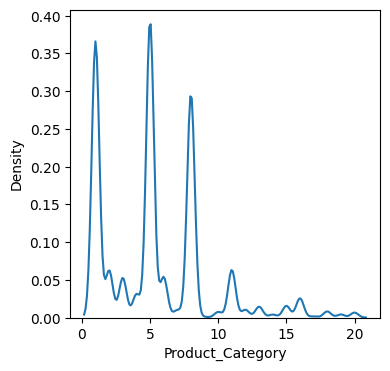

In [81]:
plt.figure(figsize=(4,4))
sns.kdeplot(data= walmart, x= "Product_Category")

<Axes: xlabel='Product_Category', ylabel='Count'>

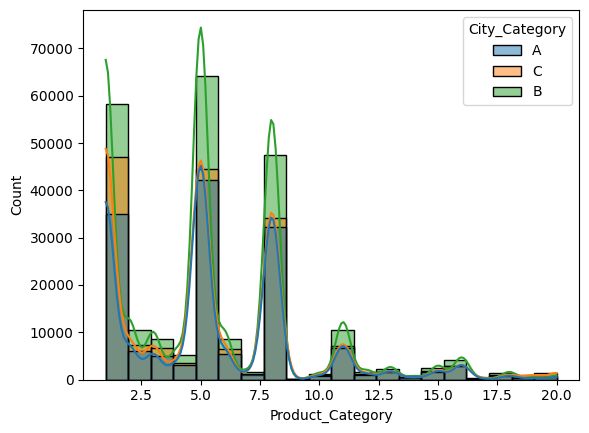

In [84]:
sns.histplot(data= walmart, x= "Product_Category", kde= True, legend= True, hue= "City_Category", bins= 20)

In [85]:
walmart["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      5963
13      5549
12      3947
7       3721
18      3125
10      2850
20      2550
19      1603
14      1523
17       578
9        335
Name: Product_Category, dtype: int64

<Axes: xlabel='User_ID', ylabel='Purchase'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


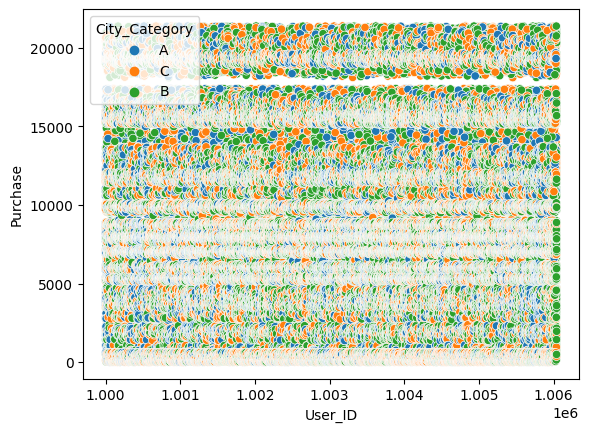

In [88]:
sns.scatterplot(x= "User_ID", y= "Purchase", hue="City_Category", data= walmart)
# WHat is this gap line?

In [116]:
len(walmart.loc[(walmart["Purchase"]> 17421) & (walmart["Purchase"]< 18106)])
# No product have price of range (17421, 18106)!

0

In [118]:
walmart["Purchase"].min()

12

In [70]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
